## EDA del proyecto

## Vista de la distribución de los datos.

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías, y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior.

In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_parquet('C:\\Users\\User\\OneDrive\\Escritorio\\Proyecto Lautaro Vergara Amodeo 2.0\\data.parquet')

data

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,...,return,release_year,release_month,month_name_es,genre_id,genre_name,company_names,cast_names,crew_names,crew_jobs
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,...,12.451801,1995,10.0,Octubre,"[16, 35, 10751]","[Animation, Comedy, Family]",[Pixar Animation Studios],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[Director, Screenplay, Screenplay, Screenplay,..."
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,...,4.043035,1995,12.0,Diciembre,"[12, 14, 10751]","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho...","[Executive Producer, Screenplay, Original Musi..."
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,...,0.000000,1995,12.0,Diciembre,"[10749, 35]","[Romance, Comedy]","[Warner Bros., Lancaster Gate]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev...","[Director, Characters, Writer, Sound Recordist]"
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,...,5.090760,1995,12.0,Diciembre,"[35, 18, 10749]","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez...","[Director, Screenplay, Producer, Producer, Pro..."
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,...,0.000000,1995,2.0,Febrero,[35],[Comedy],"[Sandollar Productions, Touchstone Pictures]","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N...","[Original Music Composer, Director of Photogra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45530,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Robin Hood,5.7,...,0.000000,1991,5.0,Mayo,"[18, 28, 10749]","[Drama, Action, Romance]","[Westdeutscher Rundfunk (WDR), Working Title F...","[Patrick Bergin, Uma Thurman, David Morrissey,...","[John Irvin, Sam Resnick, John McGrath, Sam Re...","[Director, Writer, Writer, Story, Producer, Mu..."
45532,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,...,0.000000,2011,11.0,Noviembre,[18],[Drama],[Sine Olivia],"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...","[Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, La...","[Director, Writer, Production Design, Music, E..."
45533,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,...,0.000000,2003,8.0,Agosto,"[28, 18, 53]","[Action, Drama, Thriller]",[American World Pictures],"[Erika Eleniak, Adam Baldwin, Julie du Page, J...","[Mark L. Lester, C. Courtney Joyner, Jeffrey G...","[Director, Screenplay, Screenplay, Original Mu..."
45534,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,...,0.000000,1917,10.0,Octubre,[],[],[Yermoliev],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...","[Yakov Protazanov, Joseph N. Ermolieff]","[Director, Producer]"


Con la librería Missigno podemos graficar las cantidades de datos nulos que tenemos en nuestro dataset. Este gráfico es solamente importante para mí para ver 

In [61]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: >

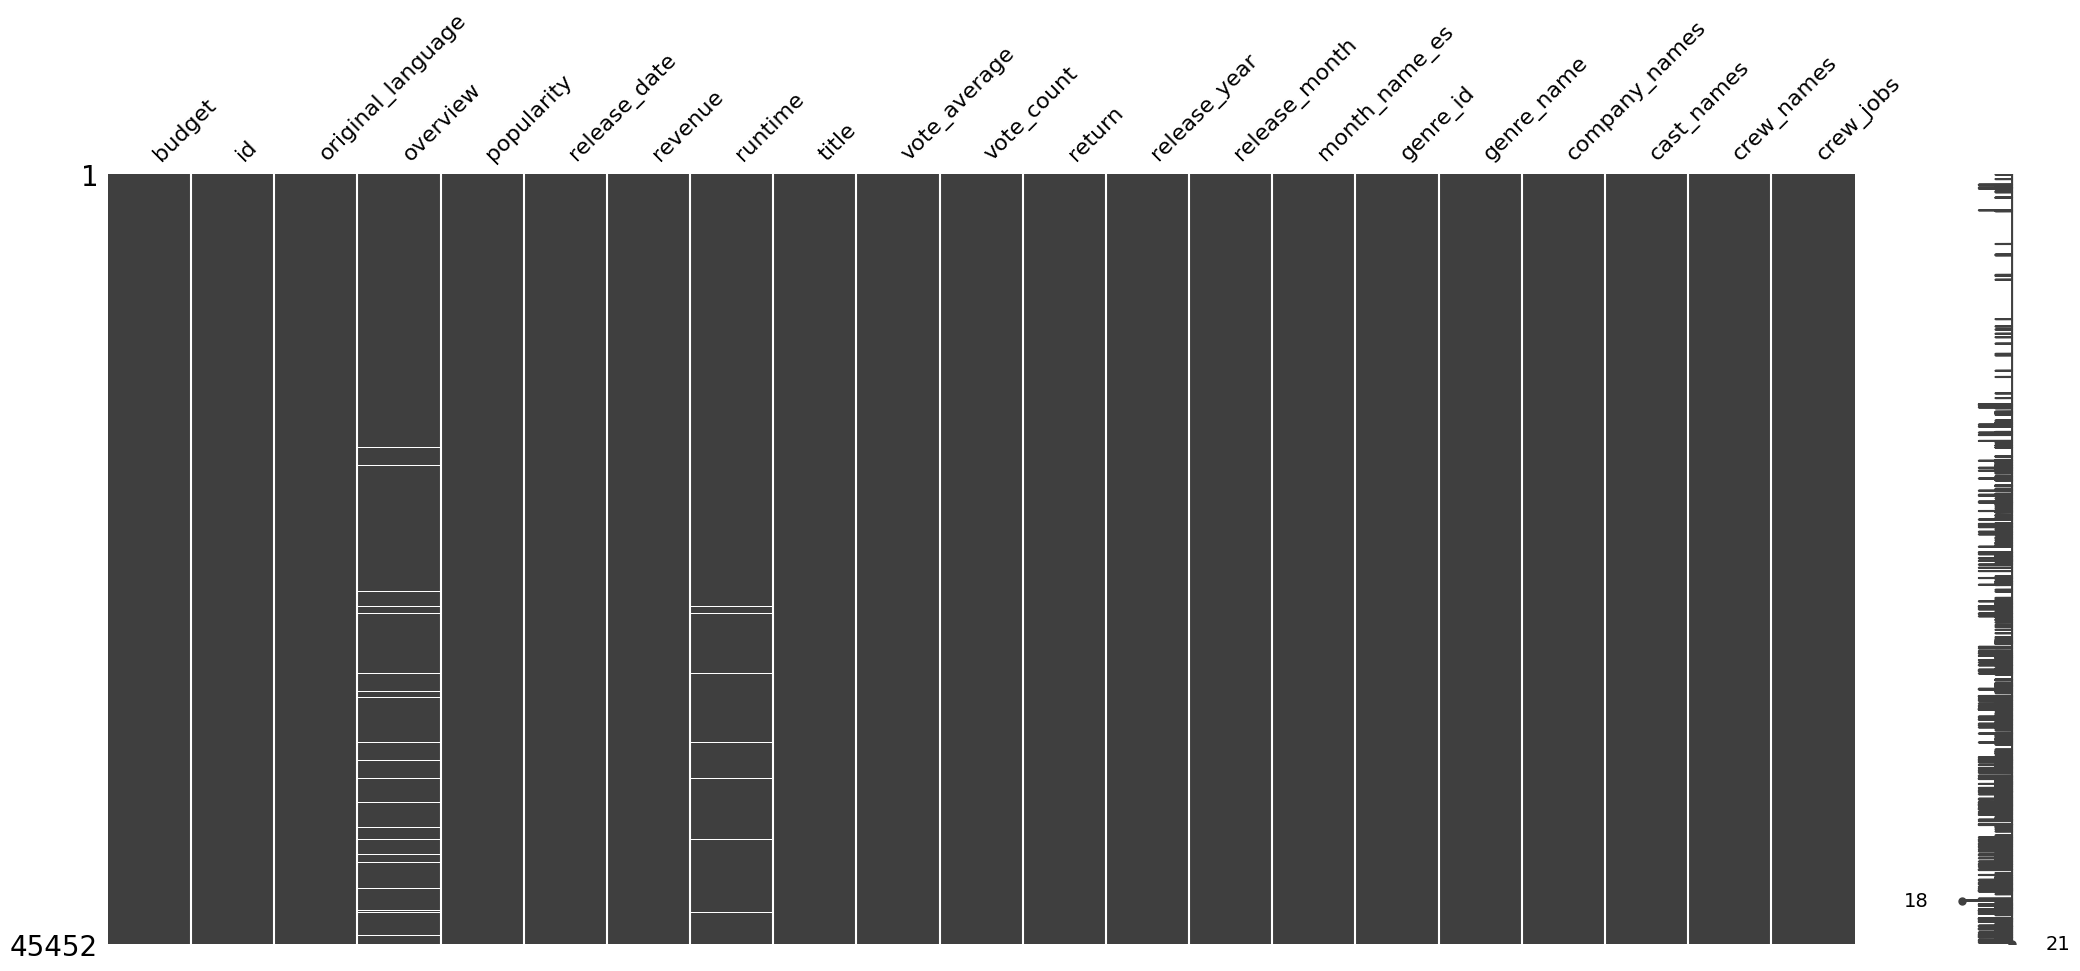

In [62]:
import missingno as msno

%matplotlib inline
msno.matrix(data)

1. **Cantidad de ganancias**

Ahora vamos a realizar una "limpieza" en la columna revenue porque hay muchos valores con 0 (esto está explicado de mejor manera en el ETL).

In [63]:
print(data['revenue'].describe())

count    4.545200e+04
mean     1.121905e+07
std      6.433916e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


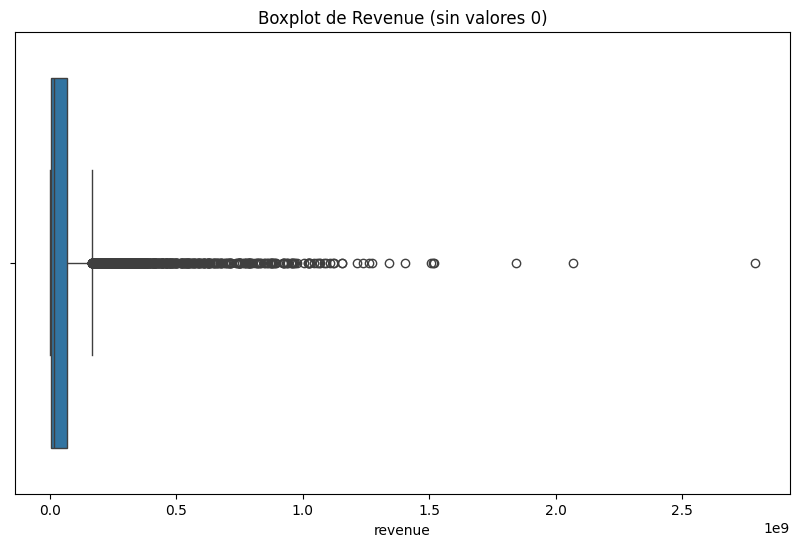

In [64]:
# Filtrar valores de revenue mayores que 0
filtered_data = data[data['revenue'] > 0]

# Crear un boxplot solo con los valores mayores a 0
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['revenue'])
plt.title('Boxplot de Revenue (sin valores 0)')
plt.show()


2. **Calificaciones**

Ahora vamos a ver las distribuciones de las calificiones de las películas en general

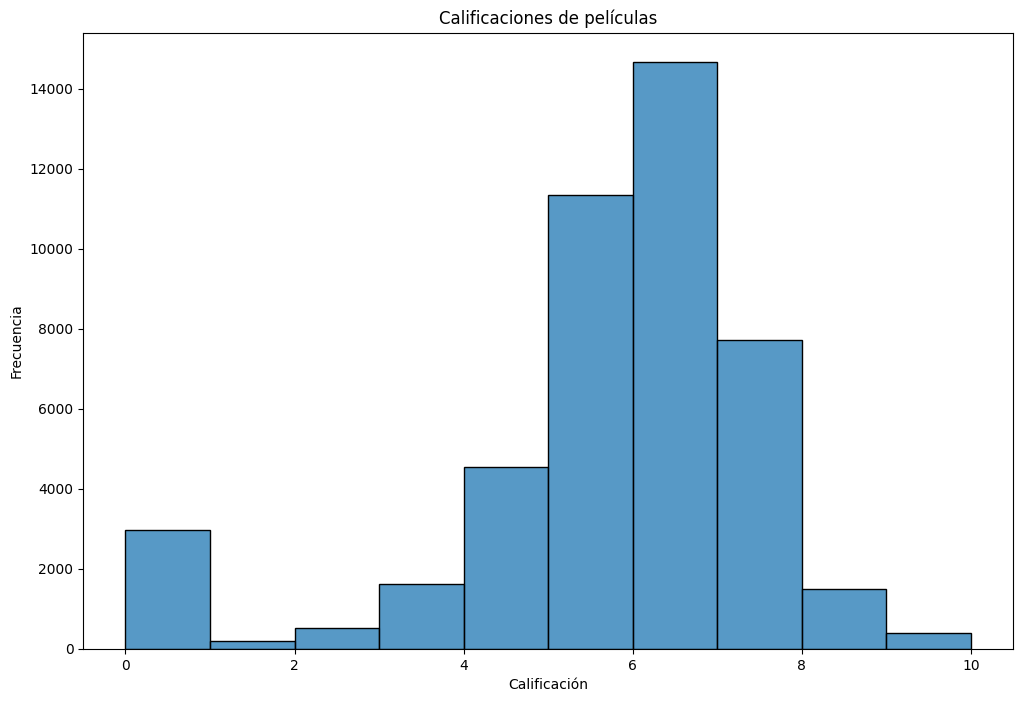

In [65]:
plt.figure(figsize=(12,8))
sns.histplot(data['vote_average'],bins=10,edgecolor='black')
plt.title('Calificaciones de películas')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar en este gráfico de histogramas que la mayoría de la películas pasan de la calificación 6. Esto quiere decir que hay una buena calidad de películas en nuestro dataset.

3. **Lanzamientos**

Ahora vamos a graficar la cantidad de películas que han sido lanzada a través de los años.

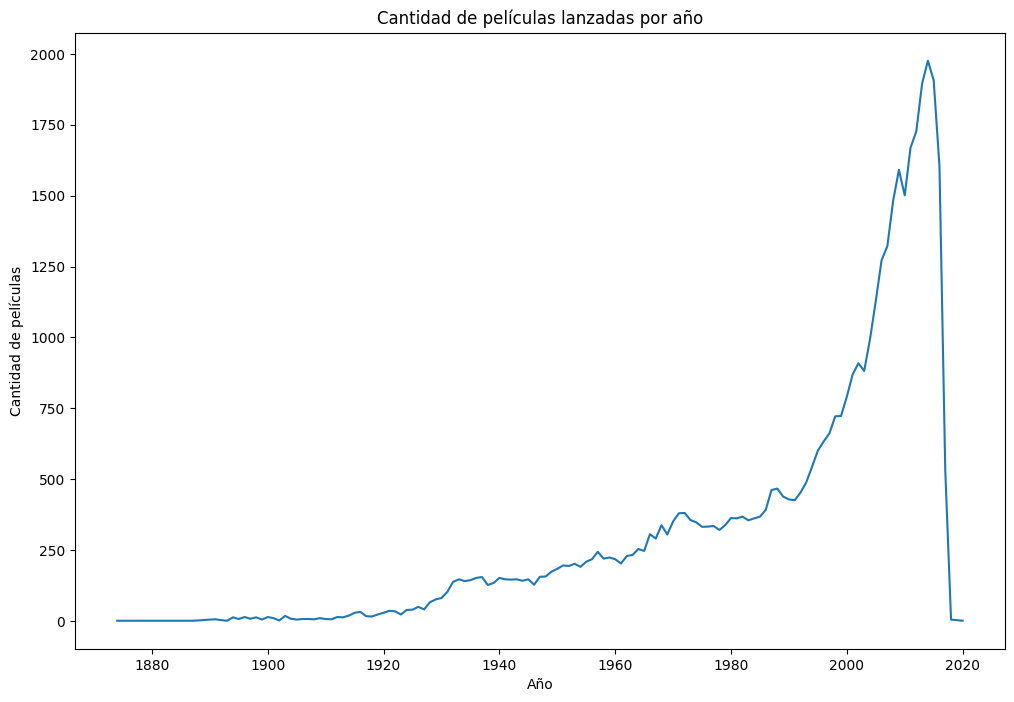

In [66]:
years = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,8))
plt.plot(years.index,years.values)
plt.title('Cantidad de películas lanzadas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.show()

Se puede observar que durante el tiempo ha ido incrementando la producción cinematográfica desde sus comienzos hasta el año 2020. El acontecimiento de la gran caída cinematogáfrica del año 2019-2020 se debe a la pandemia de COVID-19 que redujo de manera drástica la producción.

4. **Productoras**

En este gráfico vamos a observar cuales son las productoras que más películas han hecho en la historia.

In [67]:
# Asegurarte de que company_names está evaluada como lista si es un string
data['company_names'] = data['company_names'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Expandir la columna company_names (si está en formato lista) a múltiples filas
data_exploded = data.explode('company_names')


In [68]:
# Contar la frecuencia de cada compañía
company_counts = data_exploded['company_names'].value_counts()

# Seleccionar las 10 compañías más comunes
top_10_companies = company_counts.head(10)


C:\Users\User\AppData\Local\Temp\ipykernel_1720\802056920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_companies.values, y=top_10_companies.index, palette='viridis')


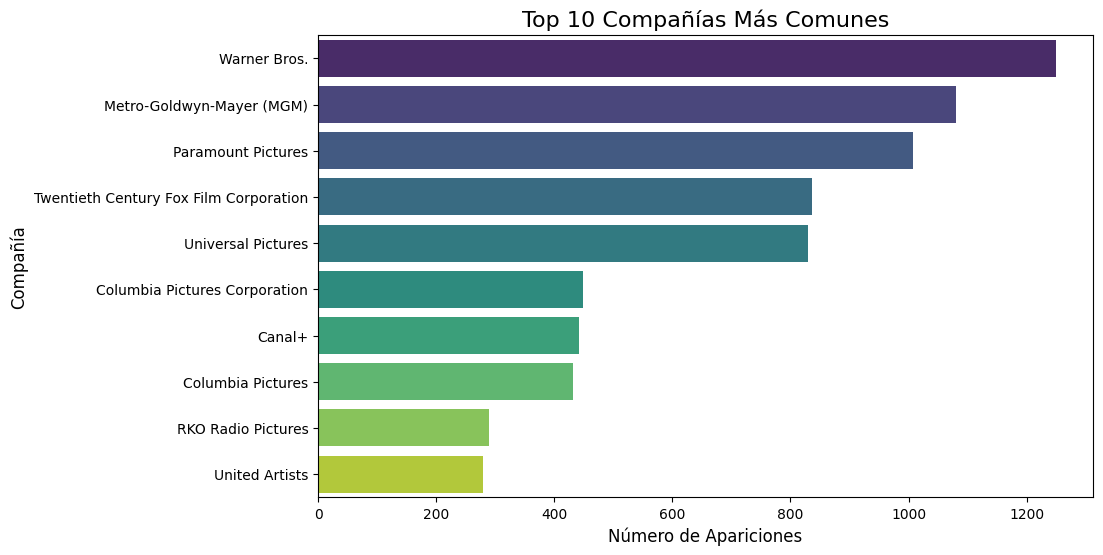

In [69]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies.values, y=top_10_companies.index, palette='viridis')

# Configurar los títulos y etiquetas
plt.title('Top 10 Compañías Más Comunes', fontsize=16)
plt.xlabel('Número de Apariciones', fontsize=12)
plt.ylabel('Compañía', fontsize=12)

# Mostrar el gráfico
plt.show()

Podemos ver el gran poderío que siempre tuvieron las productoras más grande de Estados Unidos (Warner Bors,Metro Goldwyn Mayer,etc). De hecho la única compañia no estado unidense que aparece en este gráfico es Canal + de Francia.

5. **Géneros**

In [70]:
data['genre_name'] = data['genre_name'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

data_exploded = data.explode('genre_name')

In [71]:
# Contar la frecuencia de cada compañía
genre_counts = data_exploded['genre_name'].value_counts()

# Seleccionar las 10 compañías más comunes
top_10_genres = genre_counts.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_1720\830855664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis')


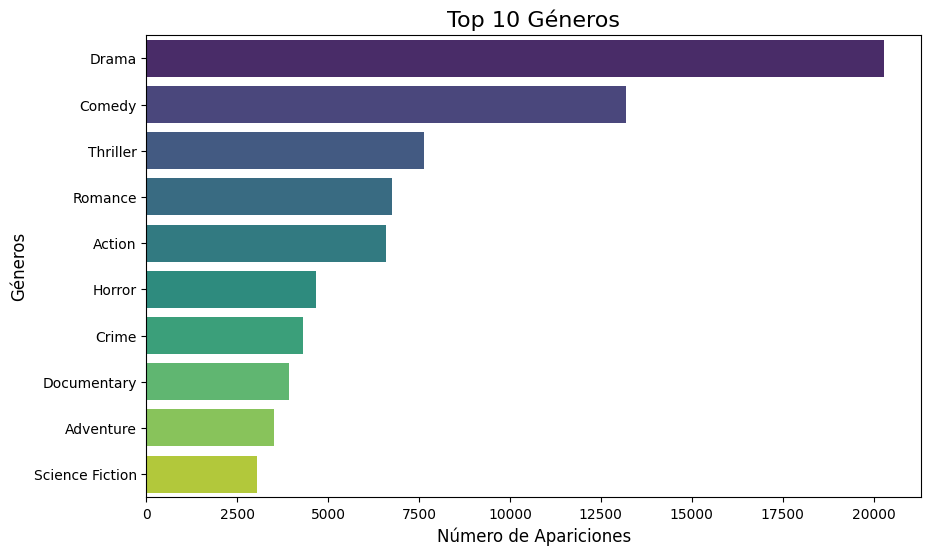

In [72]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis')

# Configurar los títulos y etiquetas
plt.title('Top 10 Géneros', fontsize=16)
plt.xlabel('Número de Apariciones', fontsize=12)
plt.ylabel('Géneros', fontsize=12)

# Mostrar el gráfico
plt.show()

Como la historia lo marca desde los inicios de los tiempos, el drama siempre va a ser el géneros más popular de todos los tiempos.

5. **Popularidad**

En este gráfico podemos observar las películas más populares de todo nuestra data.

In [73]:
popularity = data.sort_values(by='popularity',ascending=False).head(10)

In [74]:
# Seleccionar las columnas de título y popularidad para mostrar
popularity[['title', 'popularity']]


,title,popularity
30762,Minions,547.488298
33419,Wonder Woman,294.337037
42289,Beauty and the Beast,287.253654
43711,Baby Driver,228.032744
24500,Big Hero 6,213.849907
26624,Deadpool,187.860492
26626,Guardians of the Galaxy Vol. 2,185.330992
14580,Avatar,185.070892
24396,John Wick,183.870374
23719,Gone Girl,154.801009


C:\Users\User\AppData\Local\Temp\ipykernel_1720\2473915129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='title', data=popularity, palette='magma')


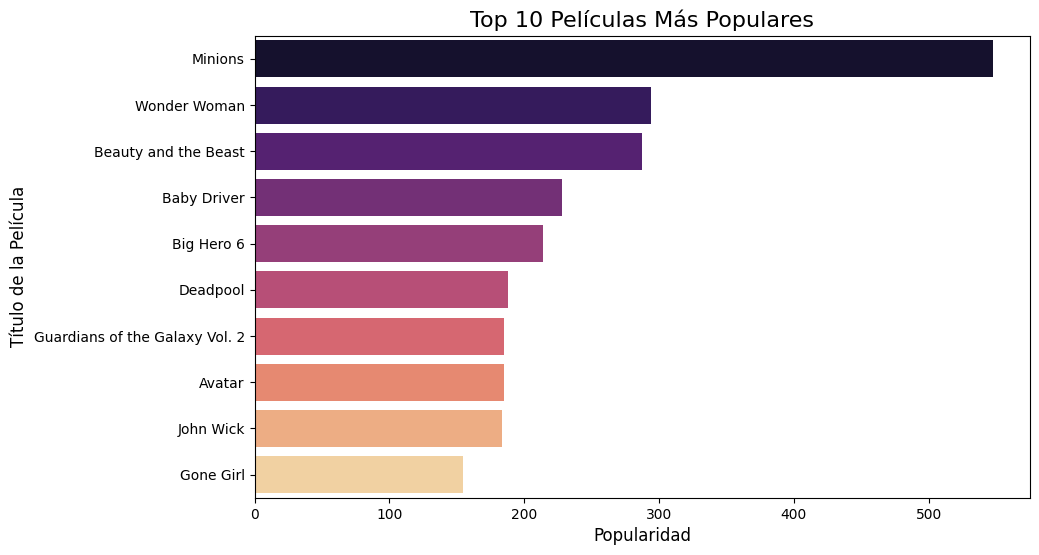

In [75]:
# Crear un gráfico de barras con las 10 películas más populares
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='title', data=popularity, palette='magma')

# Configurar los títulos y etiquetas
plt.title('Top 10 Películas Más Populares', fontsize=16)
plt.xlabel('Popularidad', fontsize=12)
plt.ylabel('Título de la Película', fontsize=12)

# Mostrar el gráfico
plt.show()

6. **Nube de palabras**

Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos

Primero instalamos esta librería ya que no viene por defecto instalada.

In [76]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


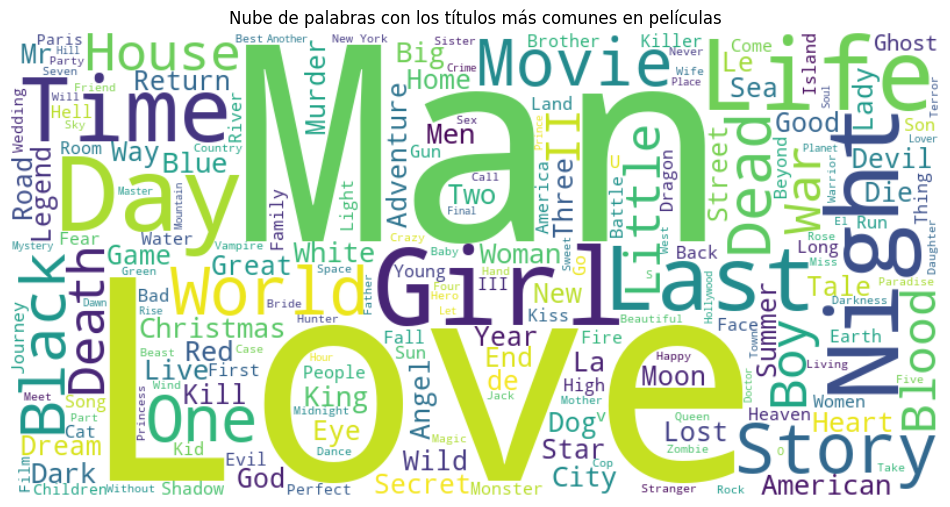

In [77]:
from wordcloud import WordCloud
#Nube de palabras con los títulos más comunes en películas
text=' '.join(data['title'])

#Graficamos
wordcloud= WordCloud(width=800,height=400,background_color='white').generate(text)


plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras con los títulos más comunes en películas')
plt.show()
